In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
import numpy as np

In [2]:
#process of loading data into juypter not book
df = pd.read_csv("C:/Users/MMU032/Desktop/Latifu_BIT 013/diabetes_unclean.csv")
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [3]:
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [4]:
df.rename(columns={'ID':'Patients ID','No_Pation':'Number of Patients','Gender':'Sex','AGE':'Patient Age '},inplace=True)
df.head()

,Patients ID,Number of Patients,Sex,Patient Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [5]:
df.isnull().sum()

Patients ID           0
Number of Patients    0
Sex                   0
Patient Age           1
Urea                  1
Cr                    2
HbA1c                 3
Chol                  2
TG                    2
HDL                   1
LDL                   2
VLDL                  1
BMI                   0
CLASS                 0
dtype: int64

In [47]:
mean_value = df['Cr'].mean()
mean_value

68.74245472837022

In [48]:
df.dropna(inplace=True)
df.isnull().sum()

Patients ID           0
Number of Patients    0
Sex                   0
Patient Age           0
Urea                  0
Cr                    0
HbA1c                 0
Chol                  0
TG                    0
HDL                   0
LDL                   0
VLDL                  0
BMI                   0
CLASS                 0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patients ID         994 non-null    int64  
 1   Number of Patients  994 non-null    int64  
 2   Sex                 994 non-null    object 
 3   Patient Age         994 non-null    float64
 4   Urea                994 non-null    float64
 5   Cr                  994 non-null    float64
 6   HbA1c               994 non-null    float64
 7   Chol                994 non-null    float64
 8   TG                  994 non-null    float64
 9   HDL                 994 non-null    float64
 10  LDL                 994 non-null    float64
 11  VLDL                994 non-null    float64
 12  BMI                 994 non-null    float64
 13  CLASS               994 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 148.8+ KB


In [50]:
df.groupby('CLASS')['CLASS'].agg('count')

CLASS
N    103
P     53
Y    838
Name: CLASS, dtype: int64

In [51]:
duplicates = df[df.duplicated()]

In [52]:
df['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

In [53]:
df['CLASS'] = df['CLASS'].str.replace('N ','N')
df['CLASS'] = df['CLASS'].str.replace('Y ','Y')

In [54]:
df['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

In [55]:
df.groupby('Sex')['Sex'].agg('count')

Sex
F    432
M    562
Name: Sex, dtype: int64

In [56]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [57]:
df['Sex'] = df['Sex'].str.replace('f','F')
df['Sex'] = df['Sex'].str.replace('m','M')
df['Sex'].unique()

array(['F', 'M'], dtype=object)

<Axes: >

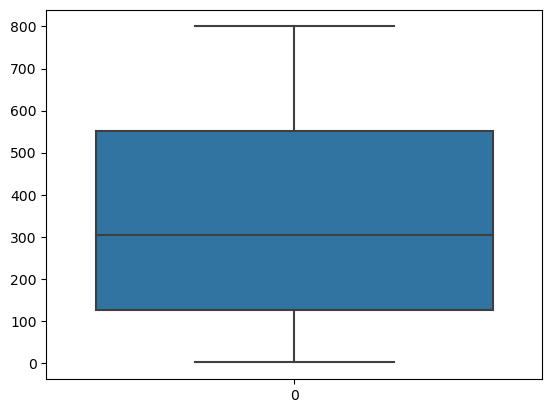

In [58]:
sns.boxplot(df['Patients ID'])

<Axes: >

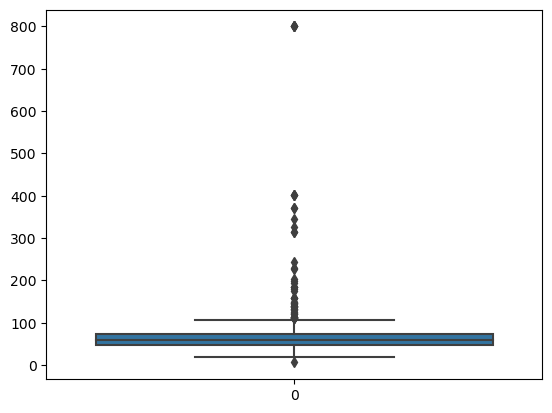

In [59]:
sns.boxplot(df['Cr'])

In [61]:
max_Cr = df['Cr'].quantile(0.995)
max_Cr

401.0

In [62]:
max_Cr = df['Cr'].quantile(0.995)
max_Cr

401.0

In [63]:
df[df['Cr']<max_Cr]

,Patients ID,Number of Patients,Sex,Patient Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,185,454316,M,64.0,8.8,106.0,8.5,5.9,2.1,1.2,4.0,1.2,32.0,Y
1002,188,454316,F,75.0,10.3,113.0,8.6,4.2,1.6,0.9,2.6,0.7,32.0,Y
1003,189,454316,M,58.0,4.0,55.0,7.9,4.9,2.0,1.2,1.4,1.1,35.0,Y
1007,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y


In [64]:
df[df['Cr']<max_Cr]

,Patients ID,Number of Patients,Sex,Patient Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,185,454316,M,64.0,8.8,106.0,8.5,5.9,2.1,1.2,4.0,1.2,32.0,Y
1002,188,454316,F,75.0,10.3,113.0,8.6,4.2,1.6,0.9,2.6,0.7,32.0,Y
1003,189,454316,M,58.0,4.0,55.0,7.9,4.9,2.0,1.2,1.4,1.1,35.0,Y
1007,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y


In [65]:
df1=df[df['Cr']<max_Cr]
df1.head()

,Patients ID,Number of Patients,Sex,Patient Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


<Axes: >

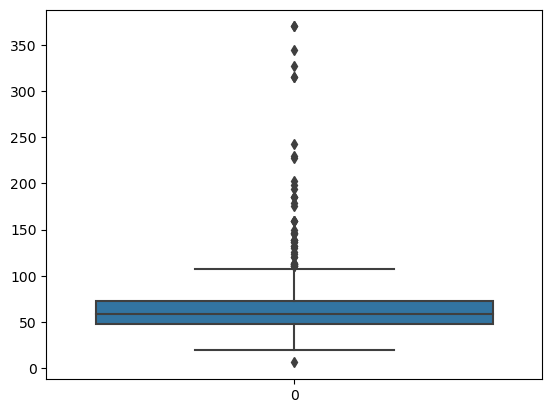

In [66]:
sns.boxplot(df1['Cr'])

In [25]:
df1.to_csv('Latifu_clean_dataset.csv')

In [26]:
import pandas as pd
import base64
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [28]:
df1 = pd.read_csv("C:/Users/MMU032/Desktop/Latifu_BIT 013/Latifu_clean_dataset.csv")
df1.head()

,Unnamed: 0,Patients ID,Number of Patients,Sex,Patient Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [29]:
df1.columns

Index(['Unnamed: 0', 'Patients ID', 'Number of Patients', 'Sex',
       'Patient Age ', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [30]:
df1=df1[['Unnamed: 0', 'Patients ID', 'Number of Patients', 'Sex', 'Patient Age ', 'Urea', 'Cr']]
df1.head()

,Unnamed: 0,Patients ID,Number of Patients,Sex,Patient Age,Urea,Cr
0,0,502,17975,F,50.0,4.7,46.0
1,1,735,34221,M,26.0,4.5,62.0
2,2,420,47975,F,50.0,4.7,46.0
3,3,680,87656,F,50.0,4.7,46.0
4,4,504,34223,M,33.0,7.1,46.0


In [31]:
import matplotlib.pyplot as plt
cor=df1.corr()
cor

C:\Users\MMU032\AppData\Local\Temp\ipykernel_9996\2207108694.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df1.corr()


,Unnamed: 0,Patients ID,Number of Patients,Patient Age,Urea,Cr
Unnamed: 0,1.000000,-0.179790,-0.055078,0.391420,0.105449,0.015338
Patients ID,-0.179790,1.000000,0.064935,-0.071945,-0.094205,-0.099281
Number of Patients,-0.055078,0.064935,1.000000,-0.088857,-0.019085,0.000857
Patient Age,0.391420,-0.071945,-0.088857,1.000000,0.108858,0.057587
Urea,0.105449,-0.094205,-0.019085,0.108858,1.000000,0.625144
Cr,0.015338,-0.099281,0.000857,0.057587,0.625144,1.000000


<Axes: >

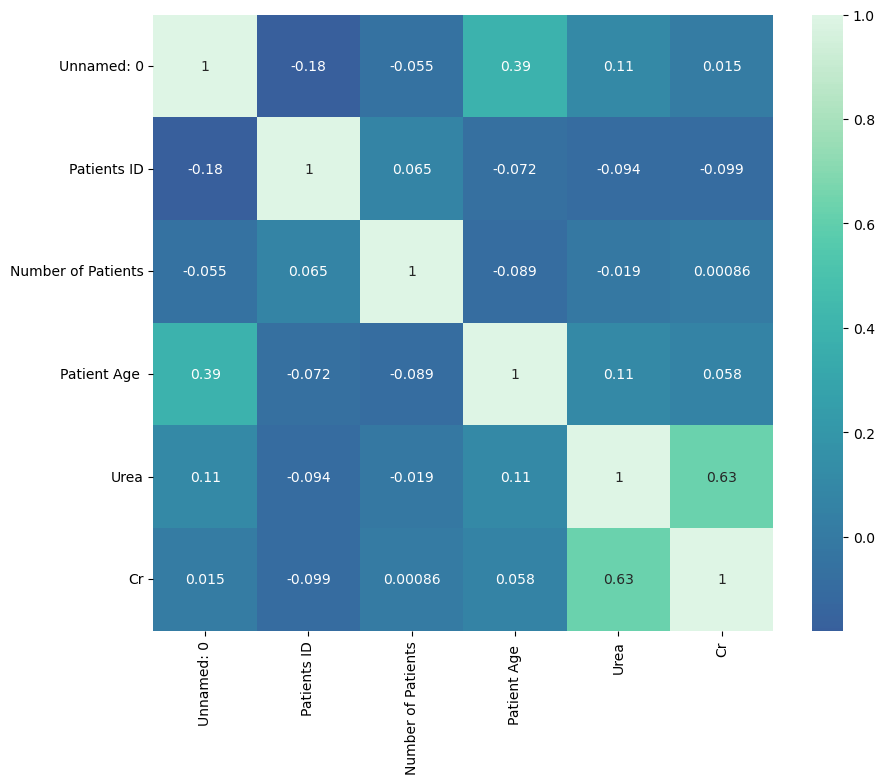

In [32]:
import matplotlib.pyplot as plt

#increasing the corrolation size
plt.figure(figsize=(10,8))
sns.heatmap(data=cor, annot=True, cmap='mako', center=0)